<h1> Classification Problem, Heart Disease - WIP (change name?) </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

data = pd.read_csv('C:/Users/ander/Programmering/heart.csv')
#data = pd.read_csv('C:\\Users\\Tim\\Desktop\\Hearth disease analysis\\input\\heart.csv')

<h2> Feature wordlist  </h2>

* __age:__ The person's age in years <br>
* __sex:__ The person's sex (1 = male, 0 = female) <br>
* __cp:__ The chest pain experienced (Value 1: typical angina, Value 2: atypical     angina, Value 3: non-anginal pain, Value 4: asymptomatic) <br>
* __trestbps:__ The person's resting blood pressure (mm Hg on admission to the hospital) <br>
* __chol:__ The person's cholesterol measurement in mg/dl <br>
* __fbs:__ The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) <br>
* __restecg:__ Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave  abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) <br>
* __thalach:__ The person's maximum heart rate achieved <br>
* __exang:__ Exercise induced angina (1 = yes; 0 = no) <br>
* __oldpeak:__ ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) <br>
* __slope:__ The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) <br>
* __ca:__ The number of major vessels (0-3) <br>
* __thal:__ A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) <br>
* __target:__ Heart disease (0 = no, 1 = yes)

<h2> Data Pre-Processing </h2>

### Inspecting the data

After importing some helpful libraries and loading in our dataset we want to inspect our data.

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
pd.DataFrame(data['target'].value_counts())

,target
1,526
0,499


We take a peak at the first 5 rows of the dataset, look at its shape (amount of (rows, columns)), check if there are any null values in the dataset and finally we look at the distribution between patients classified as having a heart disease (1) and not having a heart disease (0).

_________________________________________________

We rename some of the columns to make it easier for us to remember what they refer to. (In the beginning of the notebook we provided a more thorough explanation for what each column stands for)

In [6]:
features = ['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs', 'rest_ecg', 'max_heart_rate', 
            'ex_angina', 'oldpeak', 'slope', 'color_vsl', 'thal', 'target']
data.columns = features
data.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_heart_rate,ex_angina,oldpeak,slope,color_vsl,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data exploration

To make sense of the data set we need to look into a few different things like age, gender distribution and heart rate groups.

age distribution
gender distribution
max heart rate groupings

gender distribution  between heart disease vs no heart disease
diabetes? (high BP, low BP)

In [7]:
palette = "colorblind" # palette to use in plots/graphs 

We had a quick look at the distribution between patients classified as having a heart disease and not having a heart disease in numerical values above. However it is often easier to understand data visually so lets make a graph of it instead.

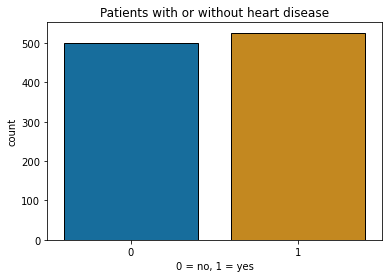

Persentage of patients without heart disease: 48.68%
Persentage of patients with heart disease: 51.32%


In [8]:
sns.countplot(x="target", edgecolor=(0,0,0), linewidth=1, data=data, palette=palette)
plt.title("Patients with or without heart disease")
plt.xlabel("0 = no, 1 = yes")
plt.show()


noDisease = len(data[data.target==0]) #count lenght of the dataframe where target = 0
haveDisease = len(data[data.target==1])
print("Persentage of patients without heart disease: {:.2f}%".format((noDisease/len(data.target))*100))
print("Persentage of patients with heart disease: {:.2f}%".format((haveDisease/len(data.target))*100))

We have a fairly even spread between patients with and without heart disease among our 1024 patients. Let us see how the patients are spread between the genders.

### Gender spread between patients

In [9]:
print("Female patients: ")
data.target[data.gender == 0].value_counts()

Female patients: 


1    226
0     86
Name: target, dtype: int64

In [10]:
femalePatientWithDisease = len(data[(data.target == 1)&(data.gender == 0)])
print("Persentage of female patients with a heart disease: {:.2f}%"
      .format((femalePatientWithDisease/len(data[data.gender == 0]))*100))

Persentage of female patients with a heart disease: 72.44%


In [11]:
print("Male patients: ")
data.target[data.gender == 1].value_counts().sort_values(ascending=True)

Male patients: 


1    300
0    413
Name: target, dtype: int64

In [12]:
malePatientWithDisease = len(data[(data.target == 1)&(data.gender == 1)])
print("Persentage of male patients with a heart disease: {:.2f}%"
      .format((malePatientWithDisease/len(data[data.gender == 1]))*100))

Persentage of male patients with a heart disease: 42.08%


While the majority of our patients in the data set are male we have an overrepresentation of female patients with heart disease. Again, following is a graph of what we just saw numerically.
____________________

Gender:
0 = female patients, 1 = male patients

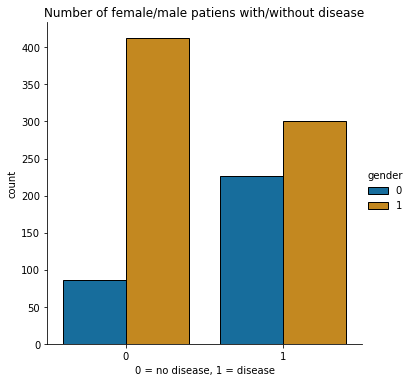

In [13]:
sns.catplot(x="target", edgecolor=(0,0,0), linewidth=1, kind="count",hue = 'gender', palette=palette, data=data)
plt.xlabel("0 = no disease, 1 = disease")
plt.title("Number of female/male patiens with/without disease")
plt.show()

### Age range of patients

Looking at the above graphs it seems to be the case that females are at a higher risk of having a heart disease. Let us see how age affects the patients.

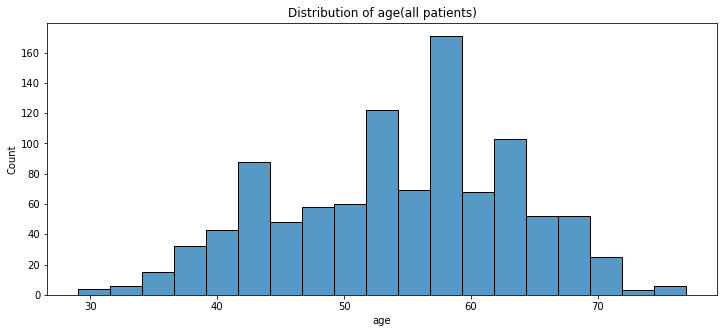

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age(all patients)")
sns.histplot(data["age"])
plt.show()

Looking at the age distribution we see that a majority of the patients are in the age range of 55 - 65. What ages are the patients in if they are diagnosed with a heart disease?

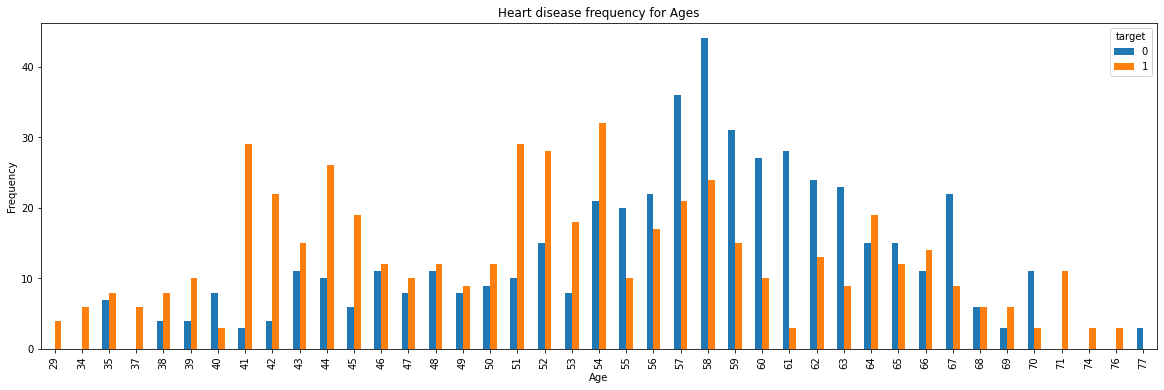

In [15]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart disease frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

It looks like we have a group of patients around 40-45 years old and a group around 51-54 with some minor spikes at 58 and 64. A majority of the patients getting checked around the sixties are not diagnosed with a heart disease.
________________
Let us have a look at what age ranges the patients are in and also what ages heart diseases are more prominent.

<AxesSubplot:title={'center':'Male ages(with a heart disease)'}, xlabel='age', ylabel='Count'>

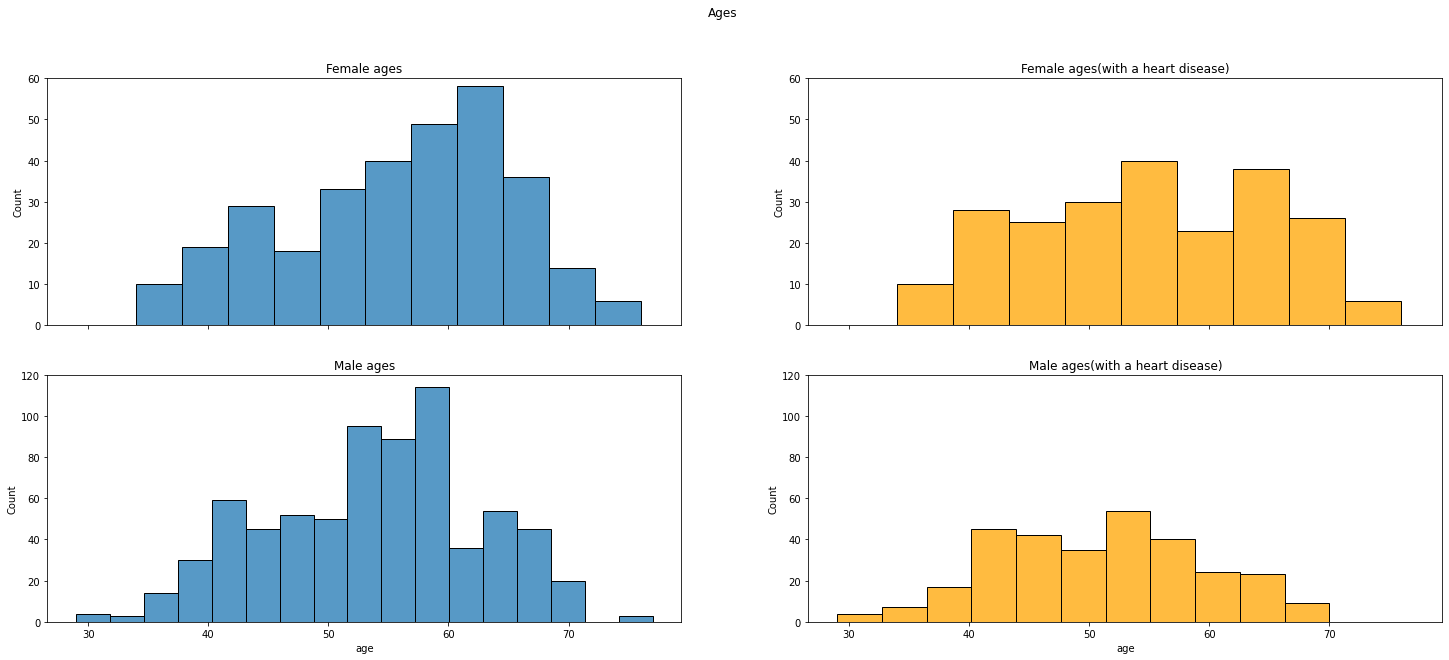

In [16]:
femaleAges = data.age[data.gender == 0]
femaleAgesWithDisease = data.age[(data.gender == 0) & (data.target == 1)]

maleAges = data.age[data.gender == 1]
maleAgesWithDisease = data.age[(data.gender == 1) & (data.target == 1)]


fig, axes = plt.subplots(2, 2, sharex=True, figsize=(25,10))
fig.suptitle('Ages')

#female ages
axes[0,0].set_title('Female ages')
axes[0,0].set_ylim(0,60)
sns.histplot(ax=axes[0,0], data=femaleAges)

#female ages (with heart disease)
axes[0,1].set_title('Female ages(with a heart disease)')
axes[0,1].set_ylim(0,60)
sns.histplot(ax=axes[0,1], data=femaleAgesWithDisease, color='orange')

#male ages
axes[1,0].set_title('Male ages')
axes[1,0].set_ylim(0,120)
sns.histplot(ax=axes[1,0], data=maleAges)

#male ages (with heart disease)
axes[1,1].set_title('Male ages(with a heart disease)')
axes[1,1].set_ylim(0,120)
sns.histplot(ax=axes[1,1], data=maleAgesWithDisease, color='orange')


A majority of the female patients are in their fifties and sixties and apart from the youngest and oldest patient group the amount of female patients with heart disease is rather even across all age groups. Interestingly, 100% of the patients at age 55 seem to have heart disease.


As for the male patiens the largest group of patients are between 55 and 60 with a rather even spread of patients with heart disease starting as early as 40 and another spike at 55.
______________________

### Chest pain

In our dataset we have a column named 'chest_pain' which ranks the chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain,  3 = asymptomatic). We would like to see how many patients suffer from the different categories.


In [17]:
chest_pain_dist = pd.DataFrame(data.groupby(by=['gender', 'target', 'chest_pain'], axis=0)['age'].count())
chest_pain_dist.columns = ['Patient Count']

chest_pain_dist.index.names = ['Gender (0:Female, 1:Male)', 'Heart Disease Result', 'Chest Pain Type']
chest_pain_dist

Patient Count
Gender (0:Female, 1:Male) Heart Disease Result Chest Pain Type               
0                         0                    0                           75
                                               1                            7
                                               2                            4
                          1                    0                           58
                                               1                           50
                                               2                          105
                                               3                           13
1                         0                    0                          300
                                               1                           26
                                               2                           61
                                               3                           26
                          1                    0                           64
                                               1                           84
                                               2                          114
                                               3                           38

### Need to add an explanation to this part

### Resting blood pressure

Next we are going to split the patients into groups using their resting blood pressure and see what groups are more prone to having a heart disease.

In [18]:
data['rest_bp'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: rest_bp, dtype: float64

__The groups are going to be:__

* 94 - 120

* 120 - 130

* 130 - 140

* 140 +

In [19]:
restBP_94_120 = pd.DataFrame(data[(data['rest_bp'] >= 94.0) & (data['rest_bp'] < 120.0)]['target']
                             .value_counts())
restBP_94_120

,target
1,117
0,84


In [20]:
restBP_120_130 = pd.DataFrame(data[(data['rest_bp'] >= 120.0) & (data['rest_bp'] < 130.0)]['target']
                             .value_counts())
restBP_120_130

,target
1,128
0,128


In [21]:
restBP_130_140 = pd.DataFrame(data[(data['rest_bp'] >= 130) & (data['rest_bp'] < 140.0)]['target']
                             .value_counts())
restBP_130_140

,target
1,144
0,100


In [22]:
restBP_140_plus = pd.DataFrame(data[(data['rest_bp'] >= 140)]['target'].value_counts())
restBP_140_plus

,target
0,187
1,137


### Add text about the above code. Maybe add plots? Same under

In [23]:
pd.DataFrame(data['ex_angina'].value_counts())

,ex_angina
0,680
1,345


In [24]:
exc_angina_cad = pd.DataFrame(data.groupby(by=['ex_angina','target'],axis=0)['age'].count())
exc_angina_cad.index.names = ['Exc Angina(1:Yes, 0:No)', 'CAD Result']
exc_angina_cad.columns = ['People Count']
exc_angina_cad

People Count
Exc Angina(1:Yes, 0:No) CAD Result              
0                       0                    225
                        1                    455
1                       0                    274
                        1                     71

### Data correlation

Now that we have had a look at different parts of the data let us check what correlations we have throughout the whole dataset.

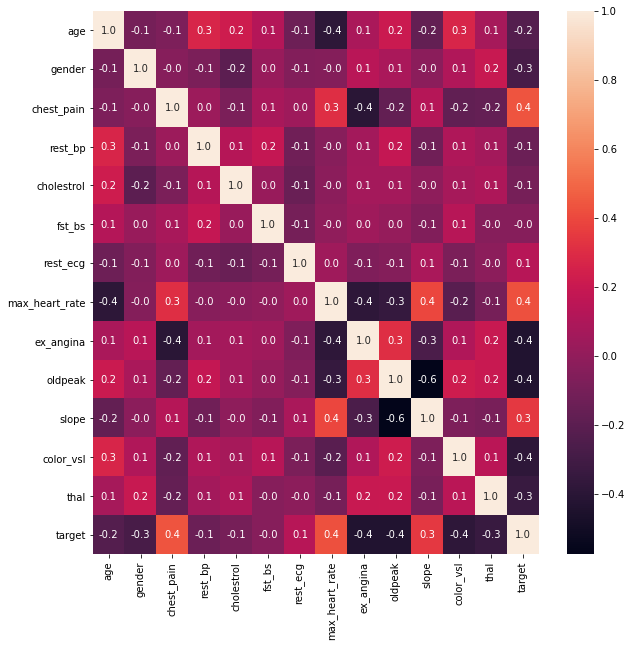

In [25]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

In [26]:
abs(data.corr()['target']).sort_values()

fst_bs            0.041164
cholestrol        0.099966
rest_ecg          0.134468
rest_bp           0.138772
age               0.229324
gender            0.279501
thal              0.337838
slope             0.345512
color_vsl         0.382085
max_heart_rate    0.422895
chest_pain        0.434854
ex_angina         0.438029
oldpeak           0.438441
target            1.000000
Name: target, dtype: float64

Using a linear correlation we see that there is not really anything in the dataset that has a high correlation. The highest correlation is between chest pains and having a heart disease but even that is around the .5 ~ .6 area which is not very high. Then there is also the max heart rate and slope which is around the .4 area for people with a heart disease. So we may not have any one feature that will make or break our algorithms by the look of things.

## Machine Learning

With the knowledge we have from the previous parts of this notebook, let us run some algorithms on the dataset and see if we can do some predictions.
________________

We start with importing a few things from the sklearn library that will do a lot of the work for us.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


#wip stuff from the video: https://www.youtube.com/watch?v=iJ5c-XoHPFo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

#feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

We then pick our target variable. Since we are interested in predicting who has heart disease we look at 'target'.
We also split the data into test and train sets and scale it.

### Pre-proccessing

In [28]:
# We are looking at target
x = data.drop(columns='target')
y = data.target

# Split the data into train and test, 20% of the data will be used to test our model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Scale the data
sc = MinMaxScaler(feature_range=(-1,1))
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train[:5]

array([[-0.45833333,  1.        ,  1.        ,  0.01886792, -0.46118721,
        -1.        , -1.        ,  0.63358779, -1.        , -0.74193548,
         1.        ,  0.        ,  0.33333333],
       [ 0.54166667, -1.        ,  0.33333333, -0.01886792, -0.30593607,
        -1.        , -1.        ,  0.23664122, -1.        , -1.        ,
         0.        , -0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.33333333, -0.32075472, -0.45205479,
         1.        , -1.        ,  0.55725191, -1.        , -1.        ,
         1.        ,  0.5       ,  0.33333333],
       [ 0.20833333, -1.        , -1.        , -0.88679245, -0.44292237,
        -1.        , -1.        , -0.22137405, -1.        , -0.67741935,
         0.        , -1.        ,  0.33333333],
       [ 0.        ,  1.        , -1.        , -0.45283019, -0.28767123,
        -1.        ,  0.        , -0.63358779,  1.        , -0.35483871,
         0.        ,  0.        ,  1.        ]])

## Feature Selection

### Low Variance

In [29]:
# Remove low variance features
#vt = VarianceThreshold(threshold=(.9 * (1 - .9)))
#x_train = vt.fit_transform(x_train)
#x_test = vt.fit_transform(x_test)

#x_train[:5]

We can see that the cholestrol feature has been removed from the data set because of it's low variance.

### Univariate feature selection

In [30]:
# Remove all but the highest k scoring features. in this case 10
#x_train_new = SelectKBest(f_classif, k=10).fit_transform(x_train, y_train)

#print(x_train[:1])
#print(x_train_new[:1])

We can see that the features that scored the lowest was cholestrol, rest_bp and rest_ecg.

### Recursive feature elimination

Optimal number of features : 10


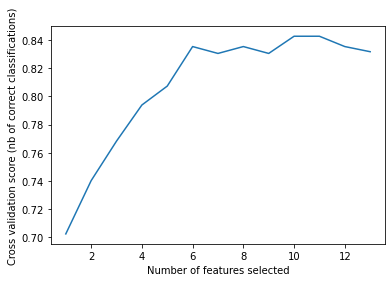

In [31]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

We can see that the optimal number of features for our dataset is 10. But 6 is not far off, bringing the model down to 6 features for performance is something worth considering

### Sequential Feature Selection

In [32]:
# Initializing a simple classifier, might want something better
knn = KNeighborsClassifier(n_neighbors=4)

#### Forward Feature Selection

In [33]:
sfs1 = SFS(knn, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-03-09 16:26:06] Features: 1/10 -- score: 0.7951219512195122[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-03-09 16:26:06] Features: 2/10 -- score: 0.9451219512195121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-03-09 16:26:06] Features: 3/10 -- score: 0.9585365853658536[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [34]:
feature_names = ('age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs', 'rest_ecg', 'max_heart_rate', 'ex_angina', 'oldpeak', 'slope', 'color_vsl', 'thal')
sfs1 = sfs1.fit(x_train, y_train, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-03-09 16:26:08] Features: 1/10 -- score: 0.7951219512195122[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-03-09 16:26:08] Features: 2/10 -- score: 0.9451219512195121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-03-09 16:26:08] Features: 3/10 -- score: 0.9585365853658536[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{1: {'feature_idx': (4,),
  'cv_scores': array([0.79512195]),
  'avg_score': 0.7951219512195122,
  'feature_names': ('cholestrol',)},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.94512195]),
  'avg_score': 0.9451219512195121,
  'feature_names': ('cholestrol', 'max_heart_rate')},
 3: {'feature_idx': (1, 4, 7),
  'cv_scores': array([0.95853659]),
  'avg_score': 0.9585365853658536,
  'feature_names': ('gender', 'cholestrol', 'max_heart_rate')},
 4: {'feature_idx': (1, 4, 7, 11),
  'cv_scores': array([0.96219512]),
  'avg_score': 0.9621951219512195,
  'feature_names': ('gender', 'cholestrol', 'max_heart_rate', 'color_vsl')},
 5: {'feature_idx': (1, 4, 7, 8, 11),
  'cv_scores': array([0.96707317]),
  'avg_score': 0.9670731707317073,
  'feature_names': ('gender',
   'cholestrol',
   'max_heart_rate',
   'ex_angina',
   'color_vsl')},
 6: {'feature_idx': (1, 4, 7, 8, 10, 11),
  'cv_scores': array([0.97804878]),
  'avg_score': 0.9780487804878049,
  'feature_names': ('gender',
   'choles

#### Backward Feature Selection

In [35]:
sfs2 = SFS(knn, 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs2 = sfs2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2021-03-09 16:26:09] Features: 12/10 -- score: 0.9719512195121951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-03-09 16:26:10] Features: 11/10 -- score: 0.973170731707317[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-03-09 16:26:10] Features: 10/10 -- score: 0.973170731707317

In [36]:
feature_names = ('age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs', 'rest_ecg', 'max_heart_rate', 'ex_angina', 'oldpeak', 'slope', 'color_vsl', 'thal')
sfs2 = sfs2.fit(x_train, y_train, custom_feature_names=feature_names)
sfs2.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2021-03-09 16:26:10] Features: 12/10 -- score: 0.9719512195121951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-03-09 16:26:10] Features: 11/10 -- score: 0.973170731707317[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-03-09 16:26:11] Features: 10/10 -- score: 0.973170731707317

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.96341463]),
  'avg_score': 0.9634146341463414,
  'feature_names': ('age',
   'gender',
   'chest_pain',
   'rest_bp',
   'cholestrol',
   'fst_bs',
   'rest_ecg',
   'max_heart_rate',
   'ex_angina',
   'oldpeak',
   'slope',
   'color_vsl',
   'thal')},
 12: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.97195122]),
  'avg_score': 0.9719512195121951,
  'feature_names': ('age',
   'gender',
   'rest_bp',
   'cholestrol',
   'fst_bs',
   'rest_ecg',
   'max_heart_rate',
   'ex_angina',
   'oldpeak',
   'slope',
   'color_vsl',
   'thal')},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.97317073]),
  'avg_score': 0.973170731707317,
  'feature_names': ('age',
   'gender',
   'rest_bp',
   'cholestrol',
   'fst_bs',
   'rest_ecg',
   'ex_angina',
   'oldpeak',
   'slope',
   'color_vsl',
   'thal')},
 10: {'feature_idx': (0, 1, 3, 4,

The differences ended up being thal and max_heart_rate.

In [37]:
print('Foward Selection:', sfs1.k_score_)
print('Backward Selection:', sfs2.k_score_)

Foward Selection: 0.974390243902439
Backward Selection: 0.973170731707317


Forward selection proved to be slightly better on this model.

## Predictions

### KNN

### Naive Bayes

### Random Forest

### Polynomial Regression

### Linear Regression

### Gradient Boosting Trees

### Elastic Net

### MLP

### Feature Selection as part of a pipeline using KNN

In [38]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, x_train, y_train, cv=cv)#need to add our y values, not done yet

print("RMSE: " + str(round(sqrt(mean_squared_error(y_train, y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_train,y_pred),2)))

RMSE: 0.32
R_squared: 0.58


In [39]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, x, y, cv=cv)#need to add our y values, not done yet

print("RMSE: " + str(round(sqrt(mean_squared_error(y, y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 0.31
R_squared: 0.62


# Above this line, trying to do things from video

We would like to try and predict if a patient has a heart disease or not, so we drop the binary "target" column (0 = no disease and 1 = has disease) from the main dataset and put the rest of the features inside the x-axis. Then we put the droped column in the y-axsis.

Following this we make use of the train_test_split functions from the sklearn library. This splits all the data into smaller pieces and slots them into either a test set or a training set. We are using a 20/70 split which means that 70% of the data is used for training and 20% is used for testing the algorithms.

In [40]:
x = data.drop(['target'], axis = 1)
y = data.target

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
# remove the '#' for any of the variables you wish to have a look at

#x_test[:10]
x_train[:10]
#y_test[:10]
#y_train[:10]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_heart_rate,ex_angina,oldpeak,slope,color_vsl,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3
960,52,0,2,136,196,0,0,169,0,0.1,1,0,2
874,59,1,3,160,273,0,0,125,0,0.0,2,0,2
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2
670,61,0,0,130,330,0,0,169,0,0.0,2,0,2
150,58,1,0,114,318,0,2,140,0,4.4,0,3,1


At this point we still need to do one more thing before we can run our algorithms on the data. We need to scale it. As you can see in the chest_pain column for example there is a ranking of 0-3 (0 = no chest pains, 3 = a lot of chest pain) but at the cholestrol column we have a number indicating the patients cholesterol measurement in mg/dl. So we need to scale everything to more similar ranges.

In [42]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
# remove the '#' for any of the variables you wish to have a look at

#x_test[:10]
x_train[:10]

array([[-1.40503359,  0.64895597,  1.97748631,  0.94789007, -0.05867706,
        -0.42209113, -0.97184588,  1.2581775 , -0.7200823 , -0.21279468,
         0.97028605,  1.17427458, -0.5144228 ],
       [ 1.26270023, -1.5409366 ,  1.01170979,  0.83269632,  0.59516646,
        -0.42209113, -0.97184588,  0.12806525, -0.7200823 , -0.9282909 ,
        -0.6668221 ,  0.21616   , -0.5144228 ],
       [-0.18232226,  0.64895597,  1.01170979, -0.08885372, -0.02021568,
         2.36915665, -0.97184588,  1.04084822, -0.7200823 , -0.9282909 ,
         0.97028605,  2.13238916, -0.5144228 ],
       [ 0.37345562, -1.5409366 , -0.91984324, -1.81676004,  0.01824571,
        -0.42209113, -0.97184588, -1.17591042, -0.7200823 , -0.03392063,
        -0.6668221 , -0.74195458, -0.5144228 ],
       [-0.18232226,  0.64895597, -0.91984324, -0.49203186,  0.67208923,
        -0.42209113,  0.92106058, -2.34948852,  1.38873015,  0.86044964,
        -0.6668221 ,  1.17427458,  1.10177143],
       [-0.29347783, -1.540936

As you can see in the array above, it looks a fair bit different from the previous array but every column is now scaled down to be between -1 and 1.

_________________________________
Now let us run an algorithm on the data.

In [44]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.5565899466989208


In [45]:
data.var()

age                 82.306450
gender               0.211944
chest_pain           1.060160
rest_bp            306.835410
cholestrol        2661.787109
fst_bs               0.127111
rest_ecg             0.278655
max_heart_rate     529.263325
ex_angina            0.223514
oldpeak              1.380750
slope                0.381622
color_vsl            1.062544
thal                 0.385219
target               0.250071
dtype: float64

add sequential feature selection

In [46]:
X = data.drop(['target', 'cholestrol','fst_bs'], axis = 1)
Y = data.target


quad = PolynomialFeatures (degree = 3)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, test_size = 0.2, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

-32.59341225560755


In [47]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.001, MSE test data: 0.004
R2 train data: 0.995, R2 test data: 0.983


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 99.02%


# DONT OLD GO CODE

In [50]:
#Count the records for major vessel categories
data['ca'].value_counts()

KeyError: 'ca'

In [ ]:
#Count the CAD and Non-CAD records for every major vessel category
pd.DataFrame(data.groupby(['ca','target'])['target'].count())

In [ ]:
#Count the records for thal categories
data['thal'].value_counts()

In [ ]:
#Count the CAD and Non-CAD records for every thal category
pd.DataFrame(data.groupby(['thal','target'])['target'].count())

In [ ]:
#Low correlation are fbs, chol and restecg, trestbps to an extent. 
#Might drop these because of noise.
data.corr()['target'].sort_values()

# Exploratory Data Analysis

In [ ]:
#How many people of age group 29-48 have heart disease?

In [ ]:
young = pd.concat([data[(data['age'] >= 29.0) & (data['age'] < 48.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'CAD_State':['Non-CAD','CAD']})],axis=1)
p=sns.barplot(data = young, y="age", x="CAD_State",edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease Result of people from age group 29 - 48")
p.axes.xaxis.label.set_text("Heart Disease Result")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#How many people of age group 48-56 have heart disease?

In [ ]:
middle = pd.concat([data[(data['age'] >= 48.0) & (data['age'] < 56.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'CAD_State':['Non-CAD','CAD']})],axis=1)
p=sns.barplot(data = middle, y="age", x="CAD_State",edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease Result of people from age group 48 - 56")
p.axes.xaxis.label.set_text("Heart Disease Result")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#How many people of age group 56-77 have heart disease?

In [ ]:
old = pd.concat([data[(data['age'] >= 56.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'CAD_State':['Non-CAD','CAD']})],axis=1)
p=sns.barplot(data = old, y="age", x="CAD_State",edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease Result of people from age group 56 - 77")
p.axes.xaxis.label.set_text("Heart Disease Result")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#How many males and females have heart disease?

In [ ]:
p = sns.countplot(data = data, x="target", hue="sex", edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease gender split")
leg = p.get_legend()
leg.set_title("Sex")
labs = leg.texts
labs[0].set_text("Male")
labs[1].set_text("Female")
leg.get_title().set_color('black')
p.axes.xaxis.label.set_text("CAD and Non-CAD states")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#How many patients suffered from various CHEST PAINS?

In [ ]:
p = sns.countplot(data = data, x="target", hue="cp", edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Chest Pain Patient Split")
leg = p.get_legend()
leg.set_title("Chest Pain")
labs = leg.texts
labs[0].set_text("typical angina")
labs[1].set_text("atypical angina")
labs[2].set_text("non-anginal pain")
labs[3].set_text("asymptomatic")
leg.get_title().set_color('black')
p.axes.xaxis.label.set_text("CAD and Non-CAD states")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#Does high blood pressure at rest corresponds to a CAD?

In [ ]:
data['trestbps'].describe()

In [ ]:
#BP Group 1: 94-120

In [ ]:
rest_bp_94_120 = pd.concat([data[(data['trestbps'] >= 94.0) & (data['trestbps'] < 120.0)][['trestbps','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'CAD_State':['Non-CAD','CAD']})],axis=1)
p=sns.barplot(data = rest_bp_94_120, y="trestbps", x="CAD_State",edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease Result of people from age group 48 - 56")
p.axes.xaxis.label.set_text("Heart Disease Result")
p.axes.yaxis.label.set_text("Number of people")

In [ ]:
#BP Group 2: 120-130

In [ ]:
#BP Group 3: 130-140

In [ ]:
#BP Group 4: 140+

In [ ]:
rest_bp_140_and_up = pd.concat([data[(data['trestbps'] >= 140.0)][['trestbps','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'CAD_State':['Non-CAD','CAD']})],axis=1)
p=sns.barplot(data = rest_bp_140_and_up, y="trestbps", x="CAD_State",edgecolor=(0,0,0), linewidth=2, palette ="Dark2")
p.set_title("Heart Disease Result of people from age group 56 - 77")
p.axes.xaxis.label.set_text("Heart Disease Result")
p.axes.yaxis.label.set_text("Number of people")